In [1]:
#importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#import dataset from
data=pd.read_csv('Mall_Customers.csv')

In [3]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.shape

(200, 5)

In [5]:
data.info

<bound method DataFrame.info of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [6]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
data['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

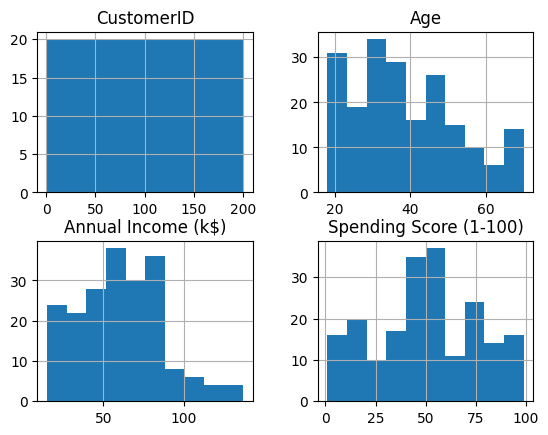

In [9]:
data.hist()
plt.show()

In [10]:
data1=pd.get_dummies(data)

In [11]:
X = data.iloc[:,[3,4]].values

In [12]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [13]:
#find optimal number of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=44)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  print(kmeans.inertia_)

269981.28
183257.8615446178
106348.37306211119
73880.64496247195
44448.45544793371
37558.92202302528
30566.45113025186
27289.228763780084
22225.448862422803
20080.727373148675


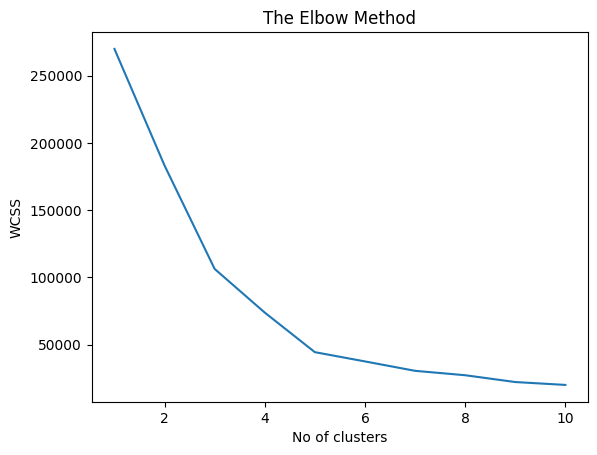

In [14]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=22)

In [16]:
y_kmeans=kmeans.fit_predict(X)

In [17]:
print(y_kmeans)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 2 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 2 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 2 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [18]:
print("Center of Clusters",kmeans.cluster_centers_,kmeans.n_iter_)

Center of Clusters [[25.72727273 79.36363636]
 [87.75       17.58333333]
 [55.0875     49.7125    ]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]] 4


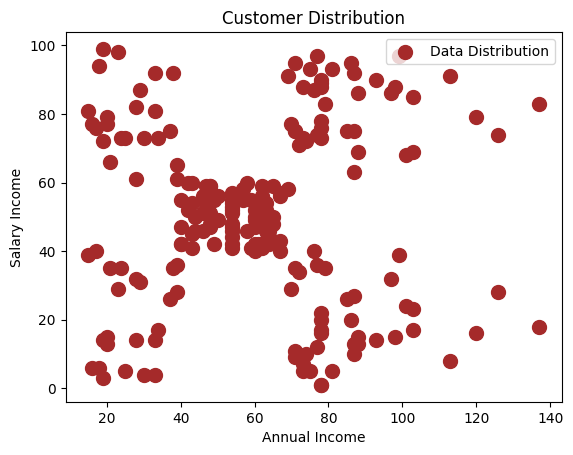

In [19]:
#data distribution without custering
plt.scatter(X[:,0],X[:,1],s=100,c='brown',label='Data Distribution')
plt.title("Customer Distribution")
plt.xlabel("Annual Income")
plt.ylabel("Salary Income")
plt.legend(loc='upper right')
plt.show()

In [20]:
type(y_kmeans)

numpy.ndarray

In [21]:
frame=pd.DataFrame(X)

In [22]:
frame

,0,1
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [23]:
frame = pd.DataFrame(X)
frame['cluster'] = y_kmeans
frame['cluster'].value_counts()

cluster
2    80
3    39
1    36
4    23
0    22
Name: count, dtype: int64

In [24]:

aincome=350
score=100

In [25]:
predict= kmeans.predict([[ aincome,score ]])

In [26]:
print(predict)

[3]


In [27]:
if predict==[0]:
  print("Customer is careless")

elif predict==[1]:
  print("Customer is standard")
elif predict==[2]:
  print("Customer is Target")
elif predict==[3]:
  print("Customer is careful")

else:
  print("Custmor is sensible" )

Customer is careful


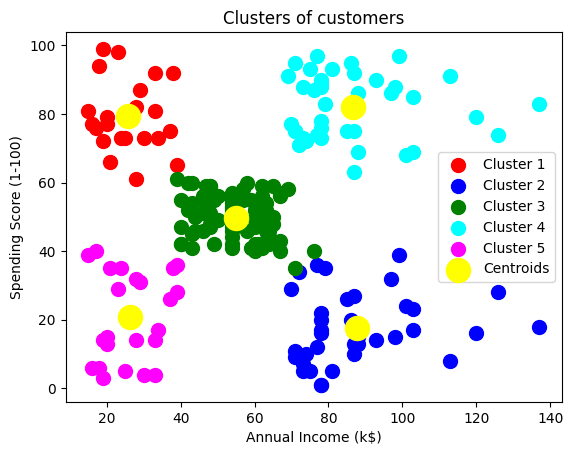

In [28]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans== 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

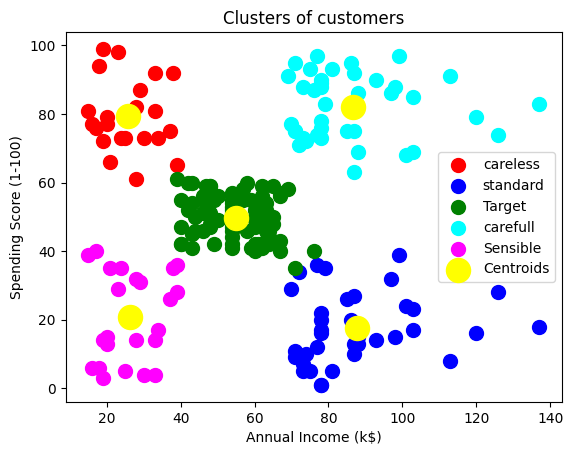

In [29]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'careless')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'carefull')
plt.scatter(X[y_kmeans== 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [33]:
import pickle
print("[INFO] Saving model...")
# Save the trained model as a pickle string.
saved_model=pickle.dump(y_kmeans,open('kmeans.pkl', 'wb'))
# Saving model to disk

[INFO] Saving model...


In [ ]:
# Load the pickled model
import pickle
pickle_in = open("/content/drive/My Drive/MLLab/kmeans.pk1","rb")
model=pickle.load(pickle_in)

In [34]:
with open('kmeans.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

In [ ]:
!pip install pyngrok
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 745 kB 13.1 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.1.0-py3-none-any.whl size=19007 sha256=9986dcb5e979b70306f7bffccd8a09d429cdfd6316e3d02f951d0338ddde5431
  Stored in directory: /root/.cache/pip/wheels/bf/e6/af/ccf6598ecefecd44104069371795cb9b3afbcd16987f6ccfb3
Successfully built pyngrok
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 13.4 MB/s 
     |████████████████████████████████| 235 kB 84.6 MB/s 
     |████████████████████████████████| 4.7 MB 80.4 MB/s 
     |████████████████████████████████| 181 kB 74.1 MB/s 
     |████████████████████████████████| 78 kB 8.2 MB/s 
     |████████████████████████████████| 164 kB 54.7 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 51 kB 7.2 MB/s 


In [ ]:
%%writefile app.py
import streamlit as st
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=22)
st.set_option('deprecation.showfileUploaderEncoding', False)
# Load the pickled model
pickle_in = open("/content/drive/My Drive/MLLab/kmeans.pk1","rb")
model=pickle.load(pickle_in)
dataset= pd.read_csv('/content/drive/My Drive/MLLab/Mall_Customers.csv')
#X = dataset.iloc[:, [2, 3]].values
X = dataset.iloc[:,[3,4]].values
y_kmeans=kmeans.fit_predict(X)
def predict_note_authentication(Income,Score):
  output= kmeans.predict([[Income,Score]])
  print("Purchased", output)
  if output==[0]:
    prediction="Customer is careless, no attention required."
  elif output==[1]:
    prediction="Customer is standard, will buy few products."
  elif output==[2]:
    prediction="Customer is Target, more attention required."
  elif output==[3]:
    prediction="Customer is careful"
  else:
    prediction="Custmor is sensible"
  print(prediction)
  return prediction
def main():

    html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">Industrial Training Seminar Project</p></center>
   <center><p style="font-size:30px;color:white;margin-top:10px;">Machine Learning</p></center>
   </div>
   </div>
   </div>
   """
    st.header("K-Means")
    Income = st.text_input("Income","")
    Score = st.text_input("Score","")
    result=""
    if st.button("Predict"):
      result=predict_note_authentication(Income,Score)
      st.success('Model has predicted {}'.format(result))

if __name__=='__main__':
  main()



Writing app.py


In [ ]:
!ngrok authtoken 2B0idUHIkdKELDlLEFeCLpoUtSh_2vTYSQ9bcUjLCNWDVhSim


Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
url


<NgrokTunnel: "http://2388-34-90-60-22.ngrok.io" -> "http://localhost:80">

In [ ]:
 !streamlit run --server.port 80 app.py

2022-09-23 02:38:47.012 INFO    numexpr.utils: NumExpr defaulting to 2 threads.



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:80
  External URL: http://34.90.60.22:80

Purchased [4]
Custmor is sensible
Purchased [4]
Custmor is sensible
